### Import libraries

In [18]:
import os
import sys
import pickle
import gzip

import wget
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Get MNIST dataset

In [11]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
dataset_path = os.path.join(dir_path, "../data/mnist.pkl.gz")
if not os.path.exists(dataset_path):
    print('Downloading dataset with wget module')
    url = 'http://ericjmichaud.com/downloads/mnist.pkl.gz'
    wget.download(url, dataset_path)  
print('Download failed') if not os.path.exists(dataset_path) else None
f = gzip.open(dataset_path, 'rb')
mnist = pickle.load(f)
f.close()

## MNIST dataset documentation
`mnist` is a list of 70000 tuples of the form `(image, label)`. The images are NumPy arrays of shape `(784,)`, which represent 28x28 images, and whose values are floats between 0 and 1. The labels are one-hot vectorized representations of the digits, with shape `(10,)`. In a tuple whose image depicts a 0, the label would look like `np.array([1, 0, 0 ...])`. Here are some images from the dataset:

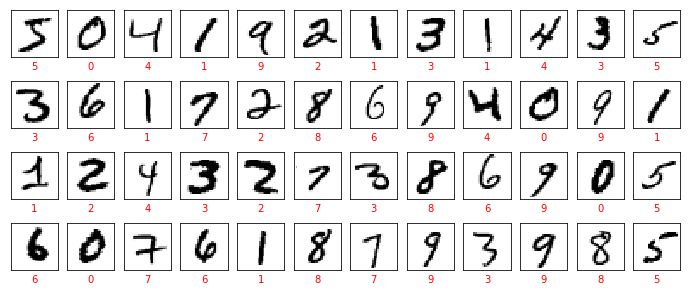

In [42]:
plt.figure(figsize=(12, 5))
for i in range(48):
    plt.subplot(4, 12, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist[i][0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(mnist[i][1])), color='red')

### Partition dataset into training, validation, and test data

In [71]:
training, validation, test = mnist[:50000], mnist[50000:60000], mnist[60000:70000]
imgs, lbs = zip(*mnist)
imgs = np.array(imgs)
lbs = np.array([np.argmax(l) for l in lbs])
training_imgs, validation_imgs, test_imgs = imgs[:50000], imgs[50000:60000], imgs[60000:70000]
training_lbs, validation_lbs, test_lbs = lbs[:50000], lbs[50000:60000], lbs[60000:70000]

### Declare TensorFlow model graph
To start, we'll use a single layer network with softmax -- taken partially from:
https://www.tensorflow.org/tutorials/keras/basic_classification

In [83]:
model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### And train it...

In [84]:
model.fit(training_imgs, training_lbs, epochs=4)

test_loss, test_acc = model.evaluate(test_imgs, test_lbs)
print('Test accuracy:', test_acc)

Epoch 1/4
50000/50000 [==============================] - 2s 45us/step - loss: 0.5089 - acc: 0.8675
Epoch 2/4
50000/50000 [==============================] - 2s 40us/step - loss: 0.3172 - acc: 0.9118
Epoch 3/4
50000/50000 [==============================] - 2s 41us/step - loss: 0.2933 - acc: 0.9180
Epoch 4/4
10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.9233


**92.3% ... not bad for the simplicity of the model. Let's change the model to add a hidden layer!**

In [86]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.fit(training_imgs, training_lbs, epochs=10)

test_loss, test_acc = model.evaluate(test_imgs, test_lbs)
print('Test accuracy:', test_acc)

Epoch 1/10
50000/50000 [==============================] - 4s 71us/step - loss: 0.2836 - acc: 0.9202
Epoch 2/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.1245 - acc: 0.9633
Epoch 3/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.0839 - acc: 0.9750
Epoch 4/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.0607 - acc: 0.9814
Epoch 5/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.0464 - acc: 0.9858
Epoch 6/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.0368 - acc: 0.9887
Epoch 7/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.0289 - acc: 0.9913
Epoch 8/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.0225 - acc: 0.9934
Epoch 9/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.0179 - acc: 0.9946
Epoch 10/10
10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.9772


### Mission accomplished!
The model got 97.7% on the test dataset, which is pretty great for only a single hidden layer. Let's see some examples of images that the network misclassified:

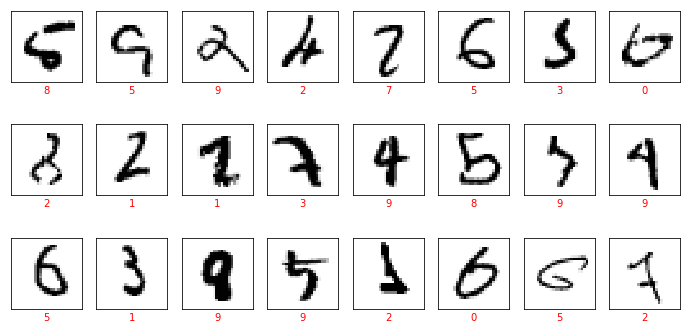

In [113]:
predictions = np.argmax(model.predict(test_imgs), axis=1)
wrongs = [i for i in range(len(predictions)) if predictions[i] != test_lbs[i]]

plt.figure(figsize=(12, 8))
for i in range(24):
    plt.subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[wrongs[i]][0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(str(predictions[wrongs[i]]), color='red')

Some of these digits are hard for even me to classify!